In [8]:
# ! pip install scikit-image

from skimage.metrics import structural_similarity as ssim

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from cued_sf2_lab.familiarisation import load_mat_img, plot_image
from cued_sf2_lab.laplacian_pyramid import quantise
from cued_sf2_lab.laplacian_pyramid import bpp
from cued_sf2_lab.jpeg_original import jpegenc, jpegdec

from scipy.optimize import minimize

In [10]:
# ------ relevant functions defined below ------

from cued_sf2_lab.dct import dct_ii
from cued_sf2_lab.dct import regroup, inverse_regroup
from cued_sf2_lab.dct import colxfm
from cued_sf2_lab.lbt import pot_ii

def dct(X, N):
    cn = dct_ii(N)
    Y = colxfm(colxfm(X, cn).T, cn).T
    return Y

def dct_regroup(Yq, N):
    Yr = regroup(Yq, N)/N
    return Yr    

def dct_iregroup(Y, N):
    X = inverse_regroup(Y, N)
    return X

def idct(Y, N):
    cn = dct_ii(N)
    Zp = colxfm(colxfm(Y.T, cn.T).T, cn.T)
    return Zp

def dctbpp(Yr, N):
    # Your code here
    total_bits = 0
    d, d = np.shape(Yr)
    step = d//N
    for i in range(0, d, step):
        for j in range(0, d, step):
            Ys = Yr[i:i+step, j:j+step] 
            bits = bpp(Ys) * Ys.size
            total_bits += bits 
    return total_bits

# ----- finish ------

In [11]:
X, _ = load_mat_img('lighthouse.mat', img_info='X')
X = X - 128.0

RMS lbt once = 5.268842305516852
Bits needed = 77600.44592300922
RMS lbt twice = 6.7262480041854555
Bits needed = 199111.74755714045


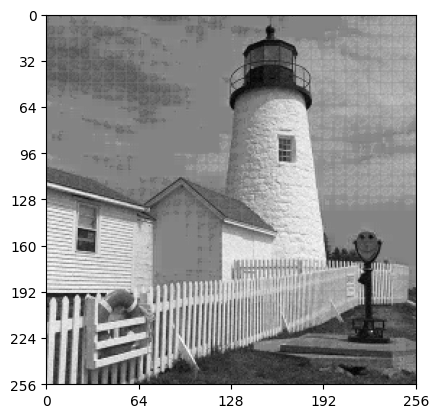

In [12]:
# ----- no regroup -----

step = 17

Y = dct(X, N=8)
Yq = quantise(Y, step, step)
Z = idct(Yq, N=8)
print(f"RMS lbt once = {np.std(Z-X)}")
print(f"Bits needed = {bpp(Yq)*Y.size}")

Y = dct(X, N=8)
Y = dct(Y, N=8)
Yq = quantise(Y, step, step)
Z = idct(Yq, N=8)
Z = idct(Z, N=8)
print(f"RMS lbt twice = {np.std(Z-X)}")
print(f"Bits needed = {bpp(Yq)*Y.size}")

fig, ax = plt.subplots()
plot_image(Z)

RMS lbt once = 5.268842305516852
Bits needed = 77600.44592300922
RMS lbt twice = 44.87212689632741
Bits needed = 7618.136927109683


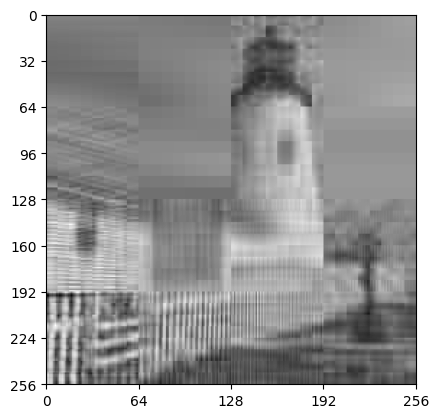

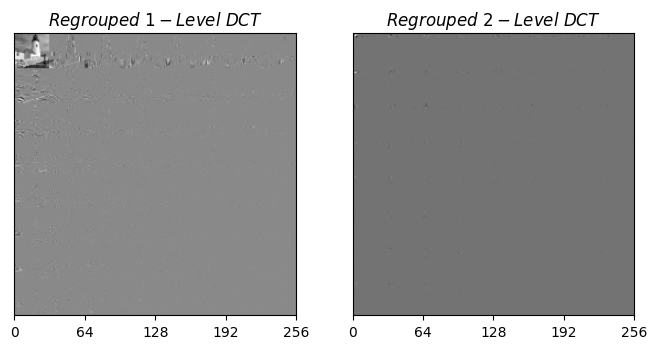

In [15]:
# ----- no regroup -----

step = 17

Y = dct(X, N=8)
Yq = quantise(Y, step, step)
Z = idct(Yq, N=8)
print(f"RMS lbt once = {np.std(Z-X)}")
print(f"Bits needed = {bpp(Yq)*Y.size}")

Y = dct(X, N=8)
Y = dct_regroup(Y, N=8)
Ysave1 = Y.copy()
Y = dct(Y, N=8)

Yq = quantise(Y, step, step)
Yr = dct_regroup(Yq, N=8)
Ysave2 = Yr.copy()

Z = idct(Yq, N=8)
Z = dct_iregroup(Z, N=8)
Z = idct(Z, N=8)
print(f"RMS lbt twice = {np.std(Z-X)}")
print(f"Bits needed = {bpp(Yq)*Y.size}")

fig, ax = plt.subplots()
plot_image(Z)

titles = ["Regrouped\ 1-Level\ DCT","Regrouped\ 2-Level\ DCT"]
imgs = [Ysave1, Ysave2]
fig, axs = plt.subplots(1, 2, figsize=(8, 4), 
                        gridspec_kw=dict(width_ratios=[img.shape[0] for img in imgs]))

for ax, img, title in zip(axs, imgs, titles):
    plot_image(img, ax=ax)
    ax.set(yticks=[], title=f'${title}$')